# Employee Churn Analysis

# #Determines
A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.


The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.




# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.preprocessing import PowerTransformer, StandardScaler, scale, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, make_scorer, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve
from scipy.cluster.hierarchy import linkage, dendrogram
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier
from kneed import KneeLocator
import math
import pickle
from scipy.stats import chi2_contingency, skew, stats
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from ipywidgets import interact
from scipy.stats import levene
from livelossplot import PlotLossesKerasTF

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [44]:
df = pd.read_csv("HR_Dataset.csv")
df_copy = df.copy()
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [46]:
df.columns = df.columns.str.strip().str.lower()

In [47]:
df.duplicated().sum()

3008

In [48]:
df[df.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  work_accident  left  \
396                     139                   3              0     1   
866                     128                   3              0     1   
1317                    127                   3              0     1   
1368                    132                   3              0     1   
1461                    142                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years departments  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [49]:
df[df.duplicated()].tail(10)

satisfaction_level  last_evaluation  number_project  \
14989                0.43             0.57               2   
14990                0.89             0.88               5   
14991                0.09             0.81               6   
14992                0.40             0.48               2   
14993                0.76             0.83               6   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  work_accident  left  \
14989                   159                   3              1     1   
14990                   228                   5              1     1   
14991                   257                   4              0     1   
14992                   155                   3              0     1   
14993                   293                   6              0     1   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years departments salary  
14989                      0   technical    low  
14990                      0     support    low  
14991                      0     support    low  
14992                      0     support    low  
14993                      0     support    low  
14994                      0     support    low  
14995                      0     support    low  
14996                      0     support    low  
14997                      0     support    low  
14998                      0     support    low

In [50]:
nums = list(df[df.duplicated()].index)
ranges = sum((list(t) for t in zip(nums, nums[1:]) if t[0]+1 != t[1]), [])
iranges = iter(nums[0:1] + ranges + nums[-1:])
print (', '.join([str(n) + '-' + str(next(iranges)) for n in iranges]))

396-396, 866-866, 1317-1317, 1368-1368, 1461-1461, 1516-1516, 1616-1616, 1696-1696, 1833-1833, 12000-14998


In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [53]:
df["left"].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [54]:
df["left"] = df["left"].map({0:"stayed", 1:"left"})

In [55]:
df.groupby("left").agg("mean")

satisfaction_level  last_evaluation  number_project  \
left                                                          
left              0.440271         0.721783        3.883476   
stayed            0.667365         0.715667        3.786800   

        average_montly_hours  time_spend_company  work_accident  \
left                                                              
left               208.16223            3.881467       0.052737   
stayed             198.94270            3.262000       0.174500   

        promotion_last_5years  
left                           
left                 0.004018  
stayed               0.019500

In [56]:
df.groupby("left").describe().T

left                                left        stayed
satisfaction_level    count  1991.000000  10000.000000
                      mean      0.440271      0.667365
                      std       0.265207      0.217082
                      min       0.090000      0.120000
                      25%       0.110000      0.540000
                      50%       0.410000      0.690000
                      75%       0.730000      0.840000
                      max       0.920000      1.000000
last_evaluation       count  1991.000000  10000.000000
                      mean      0.721783      0.715667
                      std       0.197436      0.161919
                      min       0.450000      0.360000
                      25%       0.520000      0.580000
                      50%       0.790000      0.710000
                      75%       0.910000      0.850000
                      max       1.000000      1.000000
number_project        count  1991.000000  10000.000000
                      mean      3.883476      3.786800
                      std       1.817139      0.981755
                      min       2.000000      2.000000
                      25%       2.000000      3.000000
                      50%       4.000000      4.000000
                      75%       6.000000      4.000000
                      max       7.000000      6.000000
average_montly_hours  count  1991.000000  10000.000000
                      mean    208.162230    198.942700
                      std      61.295145     45.665507
                      min     126.000000     96.000000
                      25%     146.000000    162.000000
                      50%     226.000000    198.000000
                      75%     262.500000    238.000000
                      max     310.000000    287.000000
time_spend_company    count  1991.000000  10000.000000
                      mean      3.881467      3.262000
                      std       0.974041      1.367239
                      min       2.000000      2.000000
                      25%       3.000000      2.000000
                      50%       4.000000      3.000000
                      75%       5.000000      4.000000
                      max       6.000000     10.000000
work_accident         count  1991.000000  10000.000000
                      mean      0.052737      0.174500
                      std       0.223565      0.379558
                      min       0.000000      0.000000
                      25%       0.000000      0.000000
                      50%       0.000000      0.000000
                      75%       0.000000      0.000000
                      max       1.000000      1.000000
promotion_last_5years count  1991.000000  10000.000000
                      mean      0.004018      0.019500
                      std       0.063277      0.138281
                      min       0.000000      0.000000
                      25%       0.000000      0.000000
                      50%       0.000000      0.000000
                      75%       0.000000      0.000000
                      max       1.000000      1.000000

In [57]:
df.groupby("left").describe(include='O').T

left                 left stayed
departments count    1991  10000
            unique     10     10
            top     sales  sales
            freq      550   2689
salary      count    1991  10000
            unique      3      3
            top       low    low
            freq     1174   4566

In [58]:
index = df[df["left"] == "stayed"]["departments"].value_counts(normalize = True, dropna = False).sort_index().index
left0 = df[df["left"] == "stayed"]["departments"].value_counts(normalize = True, dropna = False).sort_index().values
left1 = df[df["left"] == "left"]["departments"].value_counts(normalize = True, dropna = False).sort_index().values
pd.DataFrame({"stayed_employees":left0, "left_employees":left1}, index = index).sort_values(by = "left_employees", ascending = False)

stayed_employees  left_employees
sales                  0.2689        0.276243
technical              0.1854        0.195881
support                0.1509        0.156705
IT                     0.0818        0.079357
hr                     0.0488        0.056755
marketing              0.0561        0.056253
product_mng            0.0576        0.055249
accounting             0.0512        0.054746
RandD                  0.0609        0.042692
management             0.0384        0.026118

In [59]:
index = df[df["left"] == "stayed"]["salary"].value_counts(normalize = True, dropna = False).sort_index().index
left0 = df[df["left"] == "stayed"]["salary"].value_counts(normalize = True, dropna = False).sort_index().values
left1 = df[df["left"] == "left"]["salary"].value_counts(normalize = True, dropna = False).sort_index().values
pd.DataFrame({"stayed_employees":left0, "left_employees":left1}, index = index).sort_values(by = "left_employees", ascending = False)

stayed_employees  left_employees
low               0.4566        0.589653
medium            0.4492        0.386238
high              0.0942        0.024108

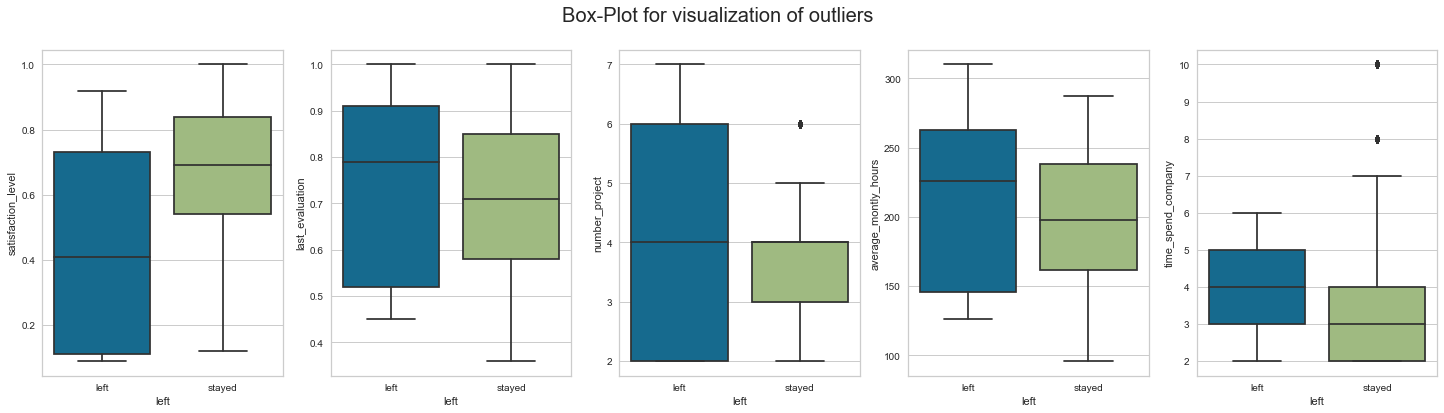

In [60]:
columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
fig, ax = plt.subplots(figsize = (25,6), nrows = 1, ncols = len(columns))
for plot_index, features in enumerate(columns):
    sns.boxplot(y = df[features], x = df["left"], ax = ax[plot_index]);
fig.suptitle("Box-Plot for visualization of outliers", fontsize=20)
plt.show();

In [61]:
df[(df["left"] == "stayed") & (df["number_project"] > 5)].shape[0] / df[(df["left"] == "stayed")].shape[0]

0.0455

In [62]:
df[(df["left"] == "stayed") & (df["time_spend_company"] > 7)].shape[0] / df[(df["left"] == "stayed")].shape[0]

0.0188

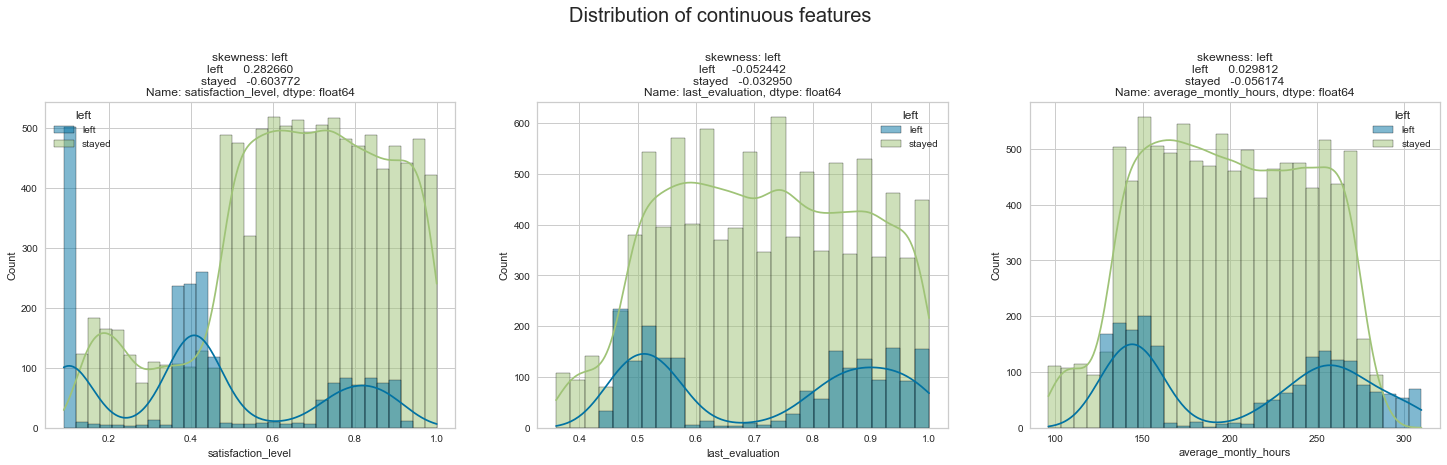

In [63]:
columns = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
fig, ax = plt.subplots(figsize = (25,6), nrows = 1, ncols = len(columns))
for plot_index, features in enumerate(columns):
    sns.histplot(x = df[features], hue = df["left"], kde = True, ax = ax[plot_index]);
    ax[plot_index].title.set_text(f'skewness: {df.groupby("left")[features].skew()}')
fig.suptitle("Distribution of continuous features", fontsize=20, y=1.1)
plt.show();

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

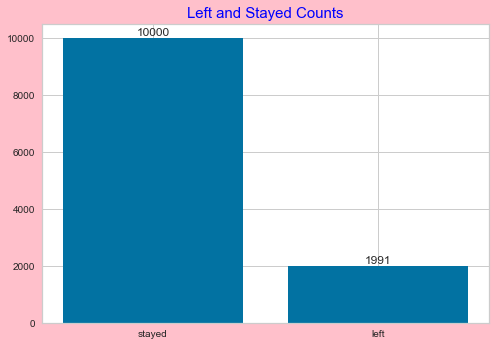

In [64]:
x= df.left.value_counts().index
y= df.left.value_counts().values

plt.figure(facecolor="pink")
plt.bar(x, y)
plt.title("Left and Stayed Counts", fontsize=15, c="blue")

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

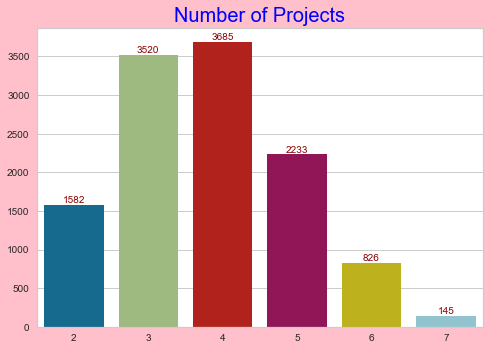

In [65]:
x= df.number_project.value_counts().index
y= df.number_project.value_counts().values

plt.figure(facecolor="pink")
ax=sns.barplot(x,y)
plt.title("Number of Projects", fontsize=20, c="blue")

ax.bar_label(ax.containers[0], color = "darkred", size = 10);

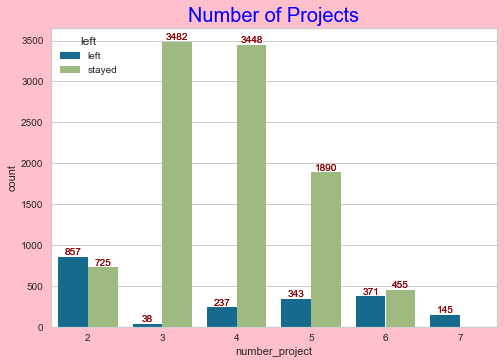

In [66]:
plt.figure(facecolor="pink")
ax=sns.countplot(x=df.number_project, hue=df.left)
plt.title("Number of Projects", fontsize=20, c="blue")

for p in ax.containers:
  ax.bar_label(ax.containers[0], color = "darkred", size = 10)
  ax.bar_label(ax.containers[1], color = "darkred", size = 10);

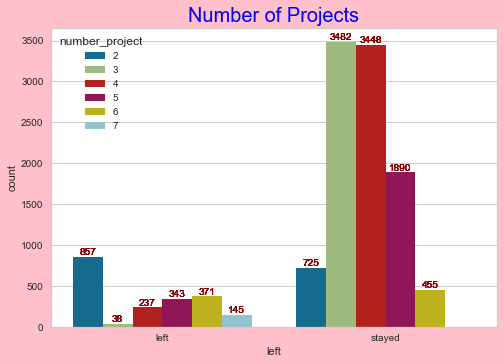

In [67]:
plt.figure(facecolor="pink")
ax=sns.countplot(x=df.left, hue=df.number_project)
plt.title("Number of Projects", fontsize=20, c="blue");
for p in ax.containers:
    for j in range(df["number_project"].nunique()):
      ax.bar_label(ax.containers[j], color = "darkred", size = 10);

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


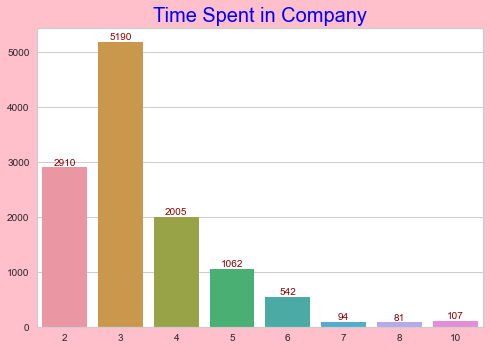

In [68]:
x= df.time_spend_company.value_counts().index
y= df.time_spend_company.value_counts().values

plt.figure(facecolor="pink")
ax=sns.barplot(x,y)
plt.title("Time Spent in Company", fontsize=20, c="blue")

ax.bar_label(ax.containers[0], color = "darkred", size = 10);

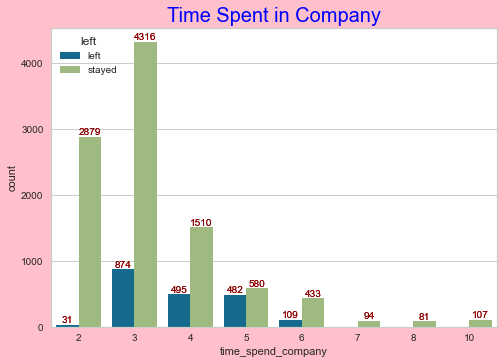

In [69]:
plt.figure(facecolor="pink")
ax=sns.countplot(x=df.time_spend_company, hue=df.left)
plt.title("Time Spent in Company", fontsize=20, c="blue")

for p in ax.containers:
  ax.bar_label(ax.containers[0], color = "darkred", size = 10)
  ax.bar_label(ax.containers[1], color = "darkred", size = 10);

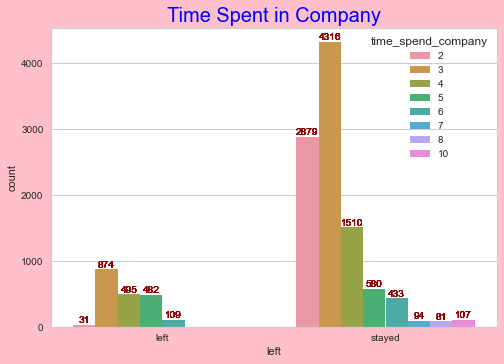

In [70]:
plt.figure(facecolor="pink")
ax=sns.countplot(x=df.left, hue=df.time_spend_company)
plt.title("Time Spent in Company", fontsize=20, c="blue")
for p in ax.containers:
    for j in range(df["time_spend_company"].nunique()):
      ax.bar_label(ax.containers[j], color = "darkred", size = 10);
plt.show()

### Subplots of Features

You can use the methods of the matplotlib.

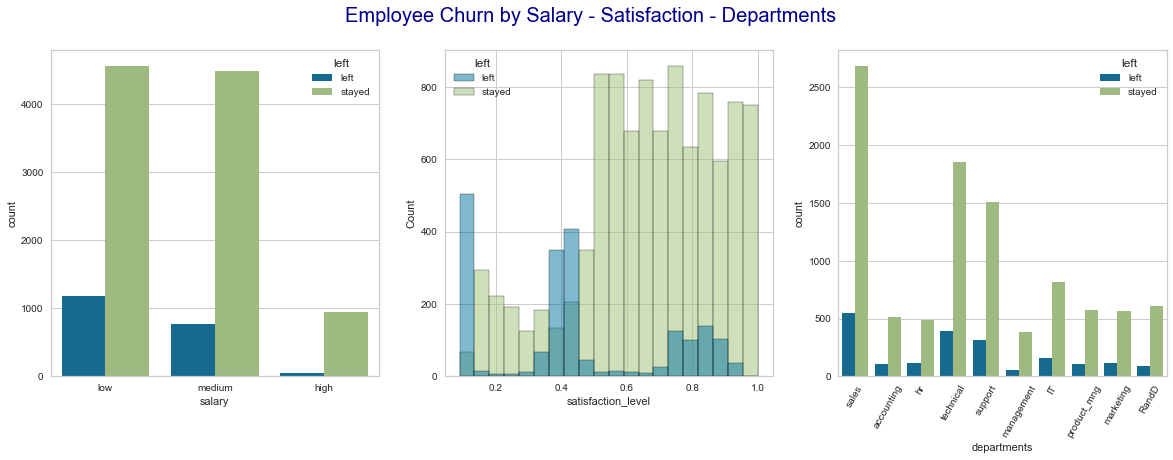

In [71]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle("Employee Churn by Salary - Satisfaction - Departments", fontsize=20, color="darkblue")

sns.countplot(x=df.salary, hue=df.left, ax=ax[0])
sns.histplot(data=df, x="satisfaction_level", hue="left", bins=20, ax=ax[1])
sns.countplot(x=df.departments, hue=df.left, ax=ax[2])

plt.xticks(rotation=60)
plt.subplots_adjust(hspace=0.3)
plt.show();

In [72]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  left  promotion_last_5years departments  \
0                   3              0  left                      0       sales   
1                   6              0  left                      0       sales   
2                   4              0  left                      0       sales   
3                   5              0  left                      0       sales   
4                   3              0  left                      0       sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Statistical Tests

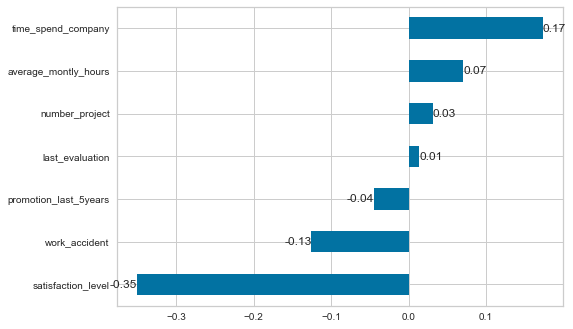

In [78]:
df["left_numeric"] = df["left"].map({"left":1, "stayed":0})
ax = df.corr()["left_numeric"].drop("left_numeric").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt="%.2f");

In [ ]:
stats.

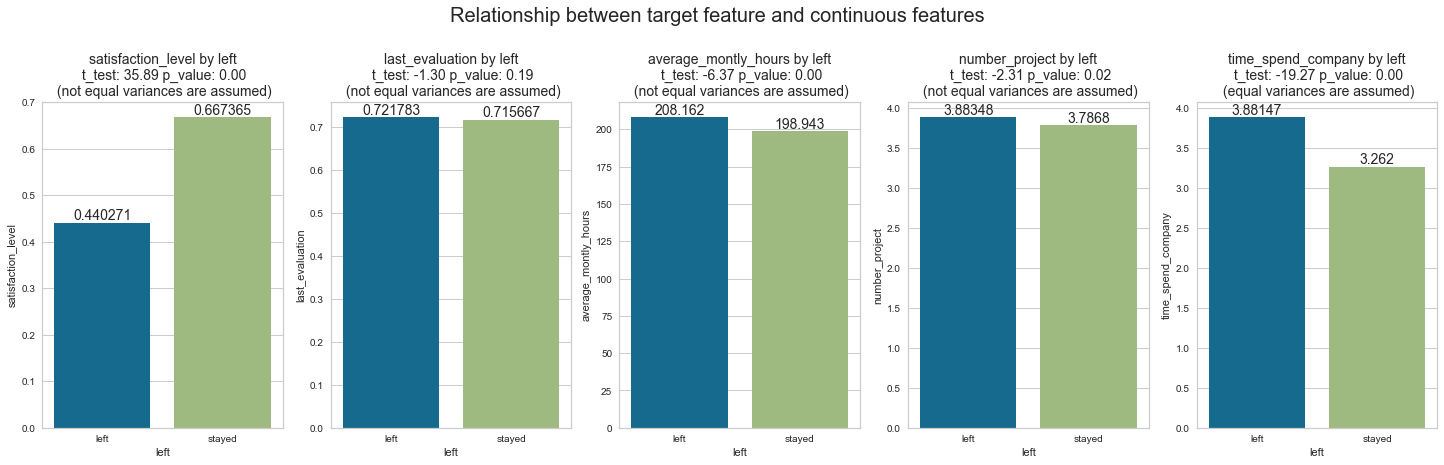

In [90]:
continuous_features= ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'number_project', 'time_spend_company']
fig, ax = plt.subplots(figsize = (25,6), nrows = 1, ncols = len(continuous_features))
alpha = 0.01
for plot_index, feature in enumerate(continuous_features):
    levene_test = levene(df[df['left_numeric'] == 0][feature], df[df['left_numeric'] == 1][feature])
    if levene_test.pvalue < alpha:
        var_assumption = False
        var_assumption_text = "not equal variances"
    else:
        var_assumption = True
        var_assumption_text = "equal variances"

    t_test = stats.ttest_ind(df[df['left_numeric'] == 0][feature], df[df['left_numeric'] == 1][feature], equal_var = var_assumption)
    if t_test.pvalue < alpha:
        footnote = f"*There is a strong statistically significant difference on {feature} in terms of left the company under the {var_assumption_text} assumed"
    else:
        footnote = f"*There is a no strong statistically significant difference on {feature} in terms of left the company under the {var_assumption_text} assumed\n t_test: {t_test.statistic} p_value: {t_test.pvalue}"

    p = sns.barplot(data = df, x = 'left', y = feature, ci = None, ax = ax[plot_index])
    p.bar_label(p.containers[0], fontsize=14)
    ax[plot_index].set_title(f"{feature} by left\n t_test: {t_test.statistic:.2f} p_value: {t_test.pvalue:.2f}\n ({var_assumption_text} are assumed)", fontsize=14)
    #p.set_title(f"{feature} by left", fontsize=14)
    #ax[plot_index].text(-0.01,-0.01,footnote)
    #plt.figtext(0,-0.1, footnote, fontsize=12);
fig.suptitle("Relationship between target feature and continuous features", fontsize=20, y=1.1)
plt.show();

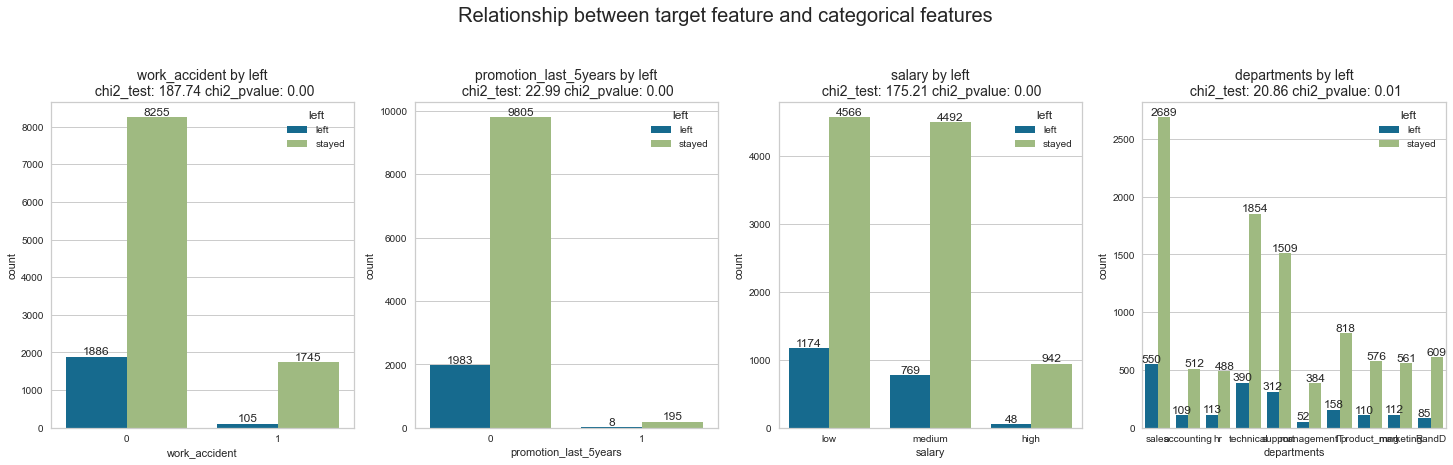

In [91]:
categorical_features = ["work_accident", "promotion_last_5years", "salary", "departments"]
fig, ax = plt.subplots(figsize = (25,6), nrows = 1, ncols = len(categorical_features))
for plot_index, feature in enumerate(categorical_features):
    contigency = pd.crosstab(df["left"], df[feature])
    c, p, dof, expected = chi2_contingency(contigency)
    plot = sns.countplot(x=df[feature], hue=df['left'], ax = ax[plot_index])
    for cat in range(df["left"].nunique()):
        plot.bar_label(plot.containers[cat], fontsize=12)
    ax[plot_index].set_title(f"{feature} by left\n chi2_test: {c:.2f} chi2_pvalue: {p:.2f}", fontsize=14)
fig.suptitle("Relationship between target feature and categorical features", fontsize=20, y=1.1)
plt.show();

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

Please see next cell for scaling

#### Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [140]:
X = df.drop(columns = ["left", "left_numeric", "departments", "salary", "work_accident", "promotion_last_5years"])
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')

In [141]:
scaler = MinMaxScaler()
X_trans = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
pt = PowerTransformer(method='yeo-johnson')
X_trans['time_spend_company'] = pt.fit_transform(X_trans[['time_spend_company']])
X_trans.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681         0.265625             0.0              0.285047   
1            0.780220         0.781250             0.6              0.775701   
2            0.021978         0.812500             1.0              0.822430   
3            0.692308         0.796875             0.6              0.593458   
4            0.307692         0.250000             0.0              0.294393   

   time_spend_company  
0           -0.076387  
1            1.720542  
2            0.772298  
3            1.334189  
4           -0.076387

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [97]:
from sklearn.neighbors import BallTree

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [142]:
hopkins(X_trans, X_trans.shape[0])

0.16526959304252373

In [143]:
def bic_score(X: np.ndarray, labels: np.array):
  """
  BIC score for the goodness of fit of clusters.
  This Python function is translated from the Golang implementation by the author of the paper. 
  The original code is available here: https://github.com/bobhancock/goxmeans/blob/a78e909e374c6f97ddd04a239658c7c5b7365e5c/km.go#L778
  """
    
  n_points = len(labels)
  n_clusters = len(set(labels))
  n_dimensions = X.shape[1]

  n_parameters = (n_clusters - 1) + (n_dimensions * n_clusters) + 1

  loglikelihood = 0
  for label_name in set(labels):
    X_cluster = X[labels == label_name]
    n_points_cluster = len(X_cluster)
    centroid = np.mean(X_cluster, axis=0)
    variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)
    loglikelihood += \
      n_points_cluster * np.log(n_points_cluster) \
      - n_points_cluster * np.log(n_points) \
      - n_points_cluster * n_dimensions / 2 * np.log(2 * math.pi * variance) \
      - (n_points_cluster - 1) / 2
    
  bic = loglikelihood - (n_parameters / 2) * np.log(n_points)
        
  return bic

In [144]:
scores = pd.DataFrame()
for k in range(2, 12):
    model = KMeans(n_clusters=k, random_state=42).fit(X_trans)
    scores.loc[k, "inertia"] = model.inertia_
    scores.loc[k, "calinski_harabasz"] = calinski_harabasz_score(X_trans, model.labels_)
    scores.loc[k, "davies_bouldin"] = davies_bouldin_score(X_trans, model.labels_)
    scores.loc[k, "silhouette"] = silhouette_score(X_trans, model.labels_)
    scores.loc[k, "bic"] = bic_score(X_trans. to_numpy(), model.labels_)
scores

inertia  calinski_harabasz  davies_bouldin  silhouette           bic
2   6978.798943       13663.981505        0.836671    0.458646 -52381.234066
3   3599.063329       18875.257811        0.799669    0.508935 -34600.686677
4   2959.262856       16166.689492        1.131116    0.448558 -33529.627494
5   2584.616924       14315.756956        1.124823    0.381807 -30876.147211
6   2272.734572       13352.082075        1.041337    0.390317 -29293.131139
7   2107.926091       12151.839904        1.134007    0.389561 -28741.195188
8   1947.666167       11412.828740        1.219003    0.377990 -27420.167693
9   1818.010873       10804.376712        1.388330    0.287198 -27361.124865
10  1693.102748       10409.731928        1.345364    0.296410 -26745.037491
11  1613.915500        9886.410442        1.399646    0.286448 -26520.355383

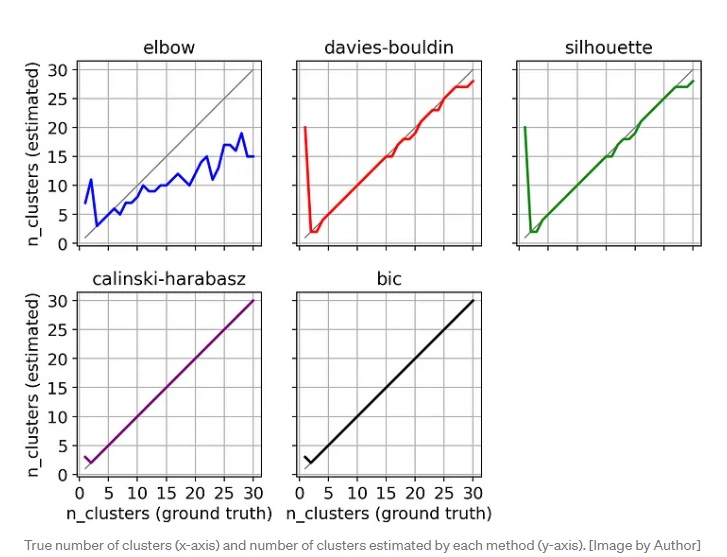
https://towardsdatascience.com/are-you-still-using-the-elbow-method-5d271b3063bd

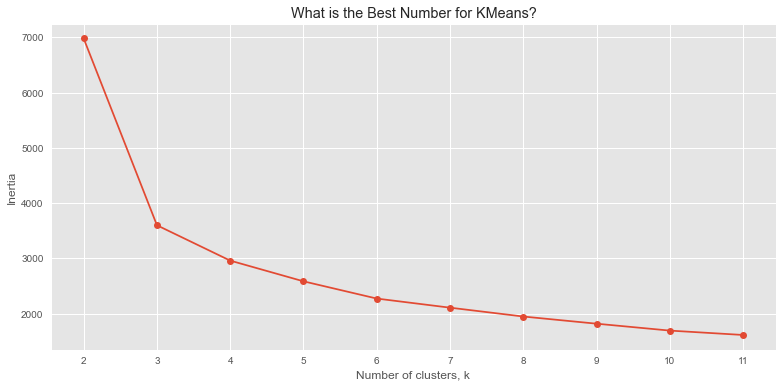

In [145]:
#First : Get the Best KMeans 
ks = range(2, 12)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(X_trans)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(13, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

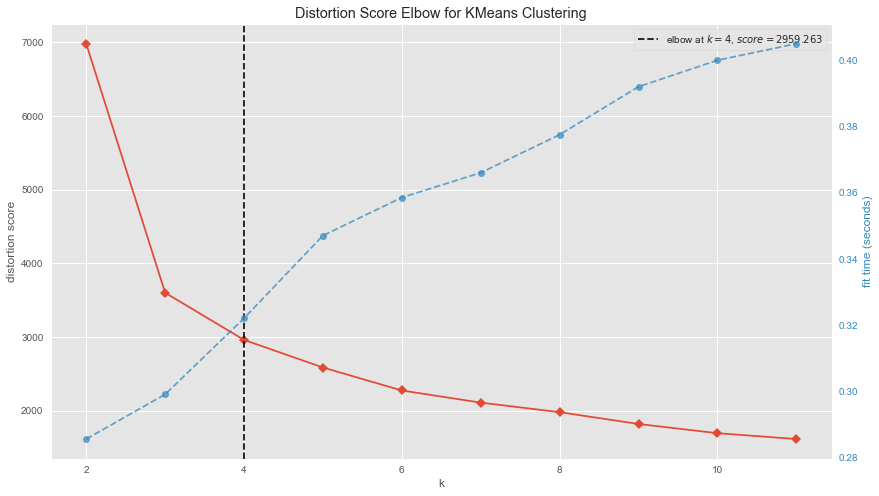

In [146]:
plt.rcParams['figure.facecolor'] = 'white'
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

plt.figure(figsize=(14, 8))
visualizer.fit(X_trans)        # Fit the data to the visualizer
visualizer.show();

In [147]:
ssd =[]

K = range(2, 12)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_trans)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_trans, model.labels_)}')

Silhouette Score for 2 clusters: 0.4586462317616253
Silhouette Score for 3 clusters: 0.5089352399048185
Silhouette Score for 4 clusters: 0.44855790209432245
Silhouette Score for 5 clusters: 0.3813861024654642
Silhouette Score for 6 clusters: 0.39101771860566087
Silhouette Score for 7 clusters: 0.38932465663853766
Silhouette Score for 8 clusters: 0.377874425784367
Silhouette Score for 9 clusters: 0.28740235802236686
Silhouette Score for 10 clusters: 0.37715024474160697
Silhouette Score for 11 clusters: 0.2865121962024498


In [148]:
model = KMeans(n_clusters=2, random_state=42).fit(X_trans)
predicted_clusters = model.labels_
pd.crosstab(predicted_clusters, df["left_numeric"], rownames=["predicted clusters"], colnames = ["ground truth"])

ground truth           0     1
predicted clusters            
0                   7195   905
1                   2805  1086

In [149]:
adjusted_rand_score(predicted_clusters, df["left_numeric"])

0.0955657836313335

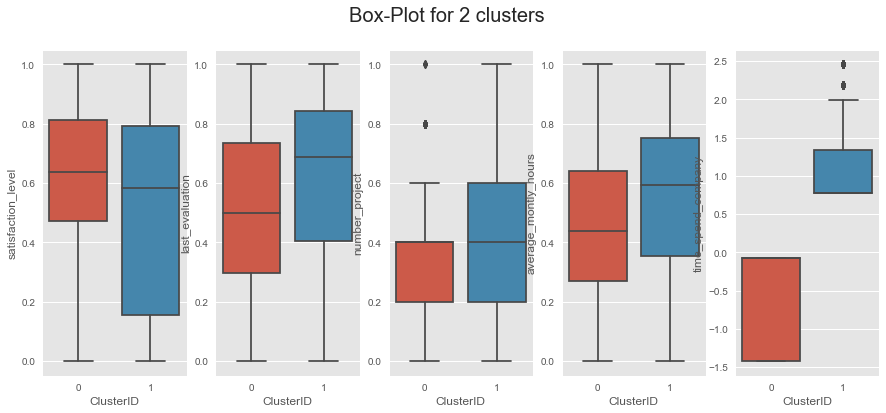

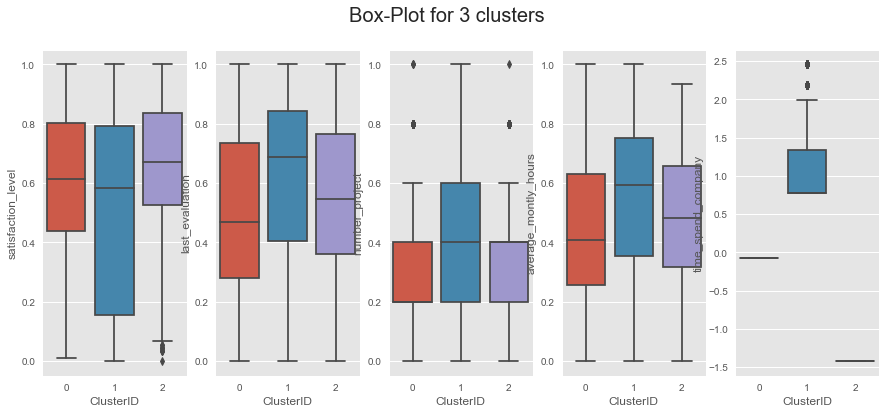

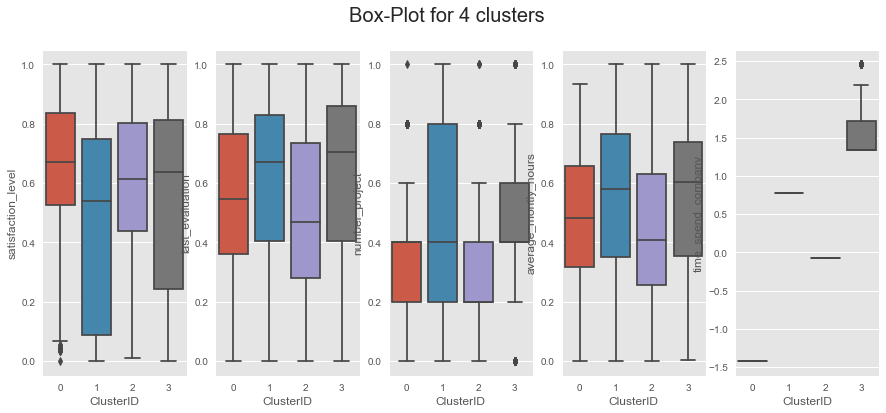

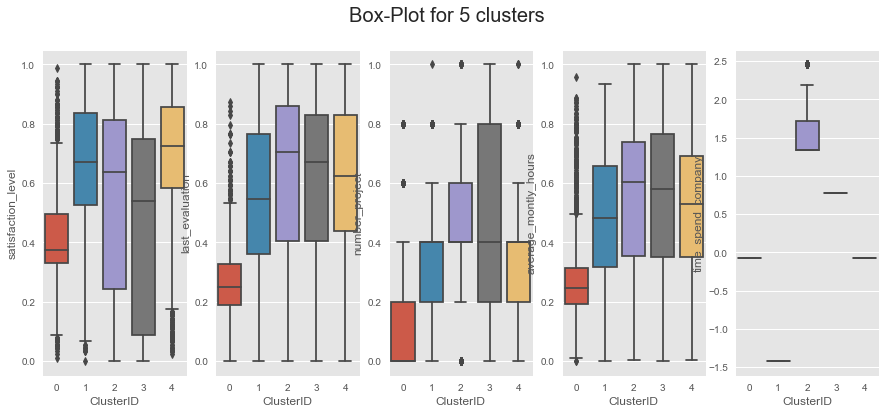

In [150]:
for k in range(2, 6):
    model = KMeans(n_clusters = k).fit(X_trans)
    model.fit_predict(X_trans)
    labels = model.labels_
    X_trans['ClusterID']=labels

    fig = plt.figure(figsize=(15,6))
    
    plt.subplot(1, 5, 1)
    sns.boxplot(X_trans['ClusterID'], X_trans['satisfaction_level'])

    plt.subplot(1, 5, 2)
    sns.boxplot(X_trans['ClusterID'], X_trans['last_evaluation'])

    plt.subplot(1, 5, 3)
    sns.boxplot(X_trans['ClusterID'], X_trans['number_project'])
    
    plt.subplot(1, 5, 4)
    sns.boxplot(X_trans['ClusterID'], X_trans['average_montly_hours'])
    
    plt.subplot(1, 5, 5)
    sns.boxplot(X_trans['ClusterID'], X_trans['time_spend_company'])
    
    fig.suptitle(f"Box-Plot for {k} clusters", fontsize=20)
    
    plt.show();

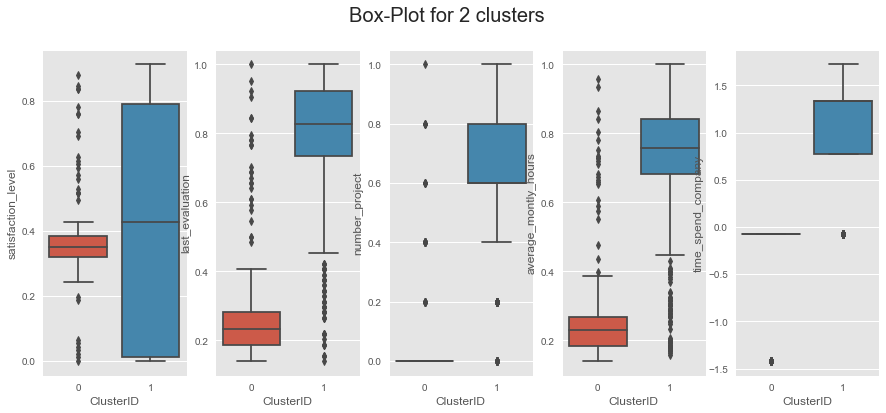

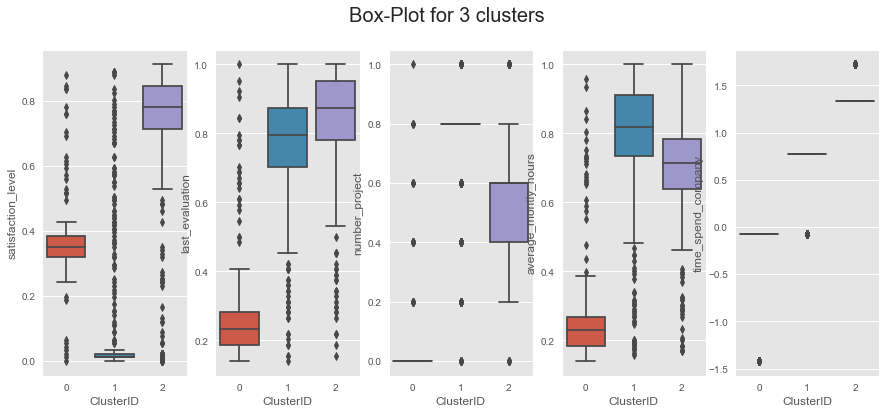

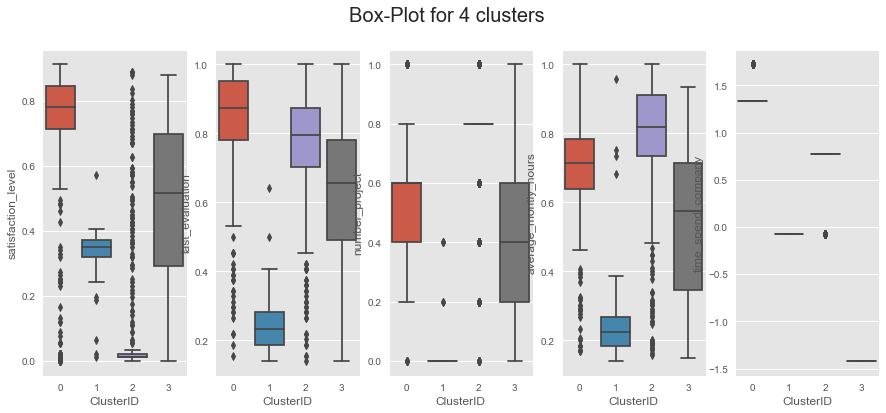

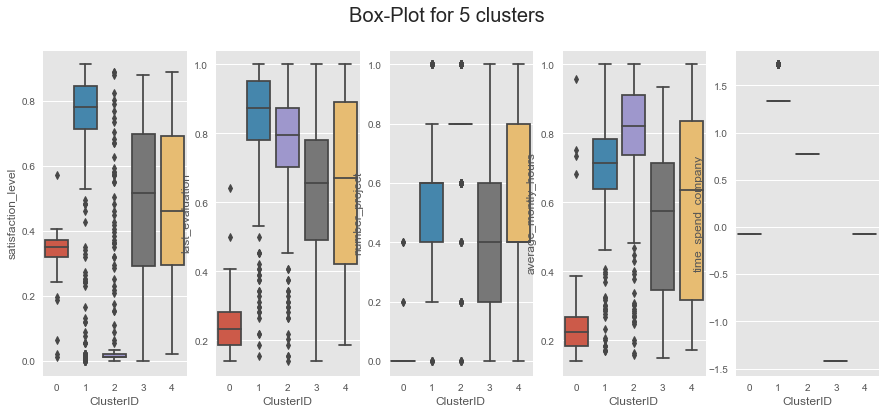

In [151]:
X_trans["left"] = df["left"]
for k in range(2, 6):
    data = X_trans[X_trans["left"] == "left"].drop(columns = ["left"])
    model = KMeans(n_clusters = k).fit(data)
    model.fit_predict(data)
    labels = model.labels_
    data['ClusterID']=labels

    fig = plt.figure(figsize=(15,6))
    
    plt.subplot(1, 5, 1)
    sns.boxplot(data['ClusterID'], data['satisfaction_level'])

    plt.subplot(1, 5, 2)
    sns.boxplot(data['ClusterID'], data['last_evaluation'])

    plt.subplot(1, 5, 3)
    sns.boxplot(data['ClusterID'], data['number_project'])
    
    plt.subplot(1, 5, 4)
    sns.boxplot(data['ClusterID'], data['average_montly_hours'])
    
    plt.subplot(1, 5, 5)
    sns.boxplot(data['ClusterID'], data['time_spend_company'])
    
    fig.suptitle(f"Box-Plot for {k} clusters", fontsize=20)
    
    plt.show();

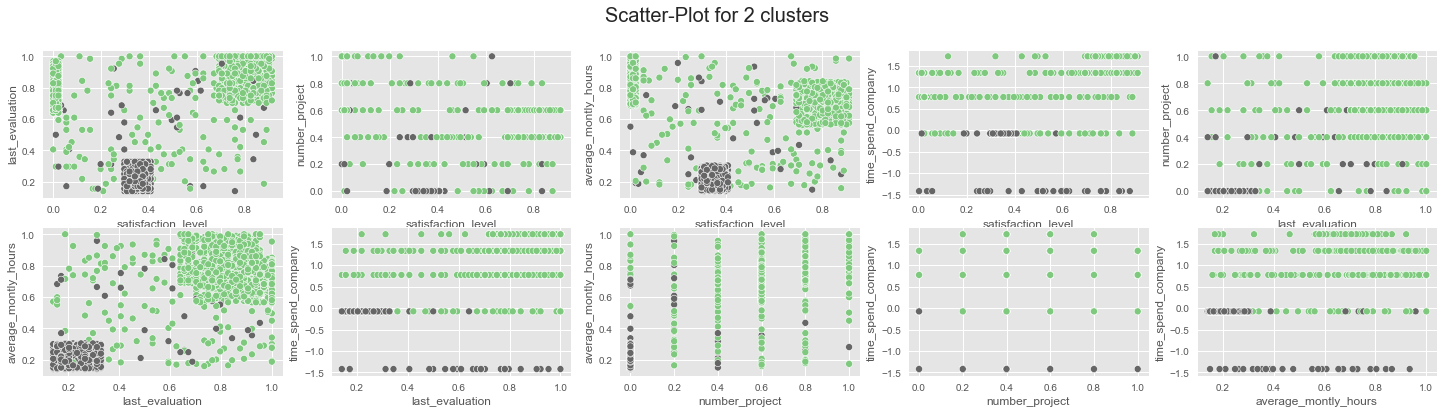

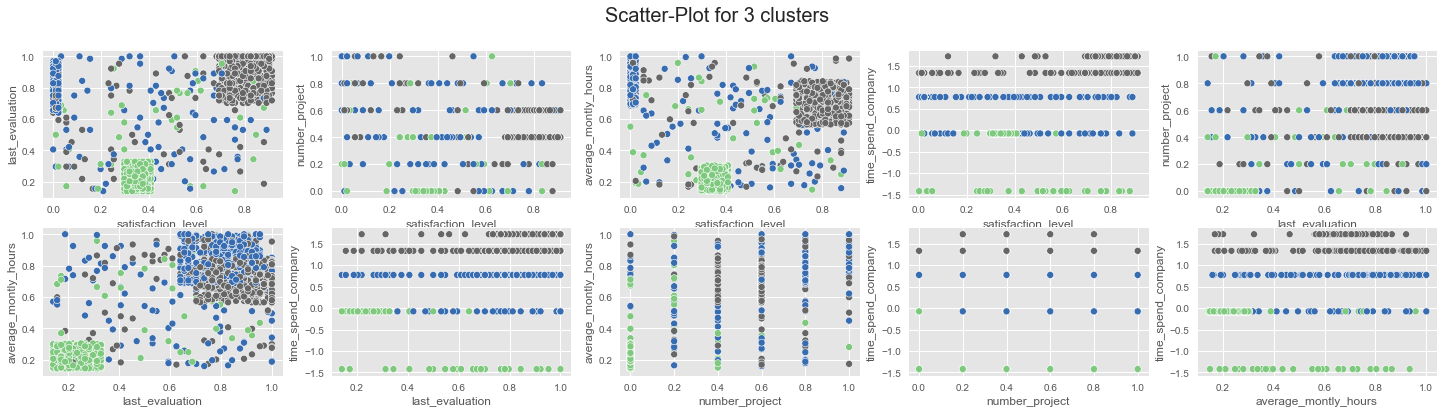

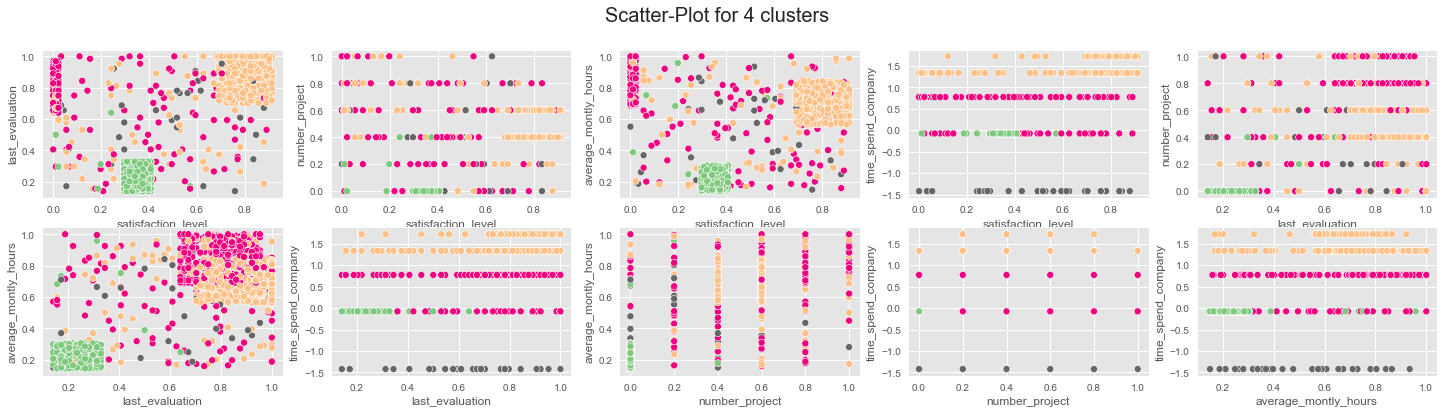

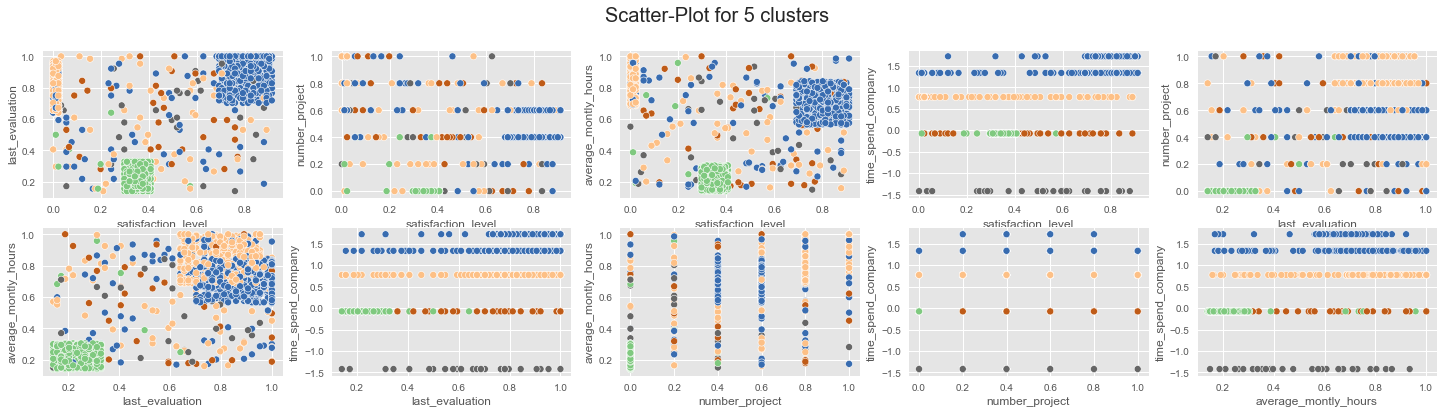

In [186]:
# Scatter plots for the result of cluster segmentation for employees who left the company
X_trans["left"] = df["left"]
feature_list = list(combinations(X_trans.drop(columns = ["left", "ClusterID"]).columns, 2))
for k in range(2, 6):
    data = X_trans[X_trans["left"] == "left"].drop(columns = ["left"])
    model = KMeans(n_clusters = k).fit(data)
    model.fit_predict(data)
    labels = model.labels_
    data['ClusterID']=labels

    fig, ax = plt.subplots(figsize = (25,6), nrows = int(len(feature_list)/5), ncols = 5)
    col_index, row_index = 0, 0
    for tup in feature_list:
        sns.scatterplot(data[tup[0]], data[tup[1]], c=data['ClusterID'],cmap='Accent', ax = ax[row_index, col_index])
        plt.xlabel(f'{tup[0]}')
        plt.ylabel(f'{tup[1]}')
        col_index+=1
        if col_index==5:
            col_index=0
            row_index=1
    fig.suptitle(f"Scatter-Plot for {k} clusters", fontsize=20)
    plt.show();

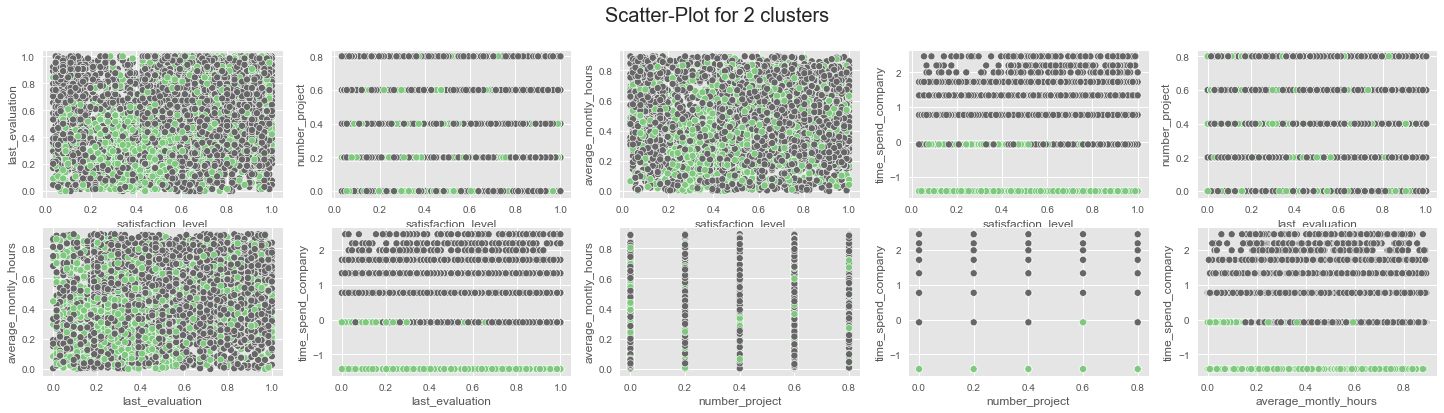

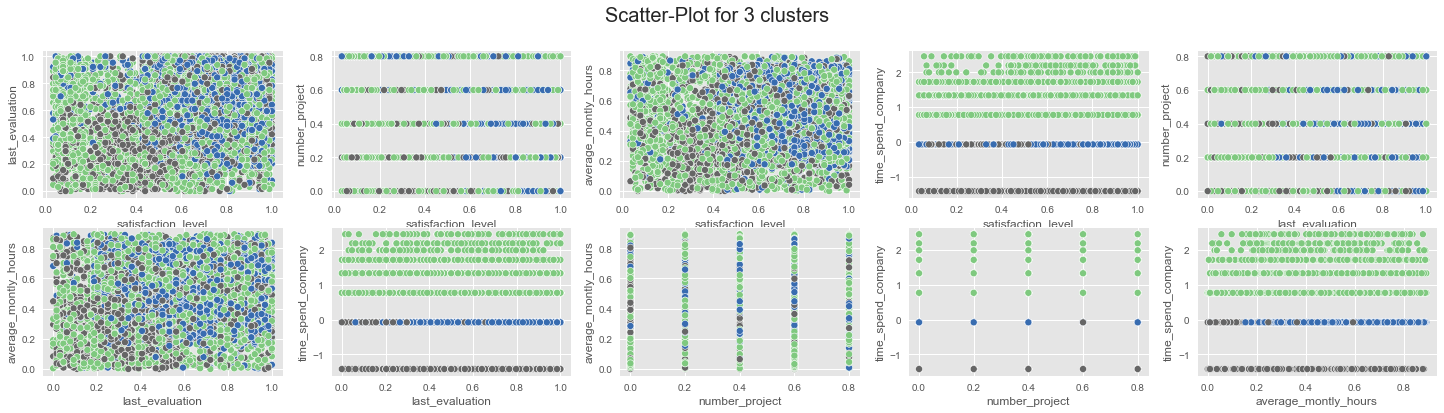

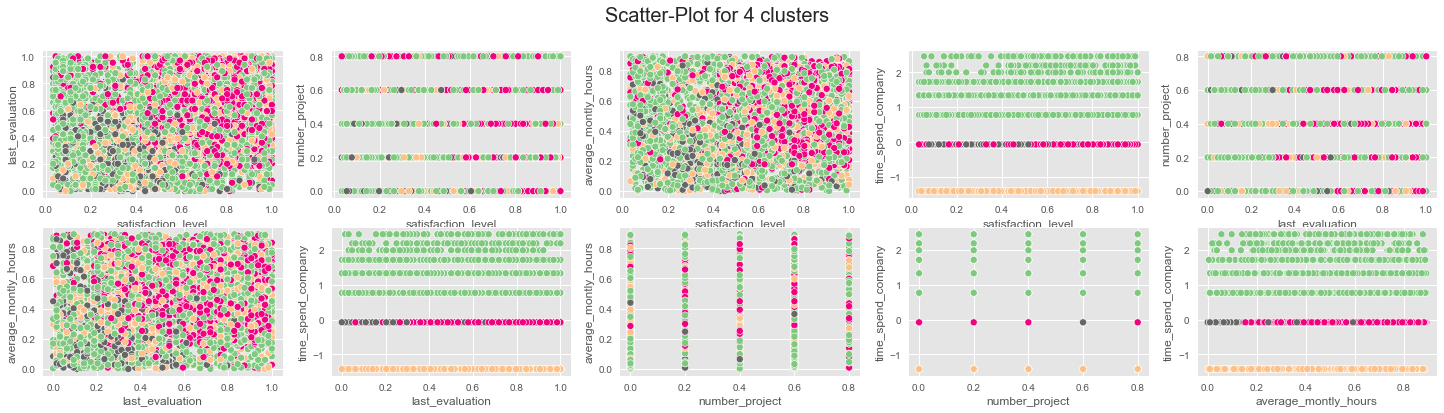

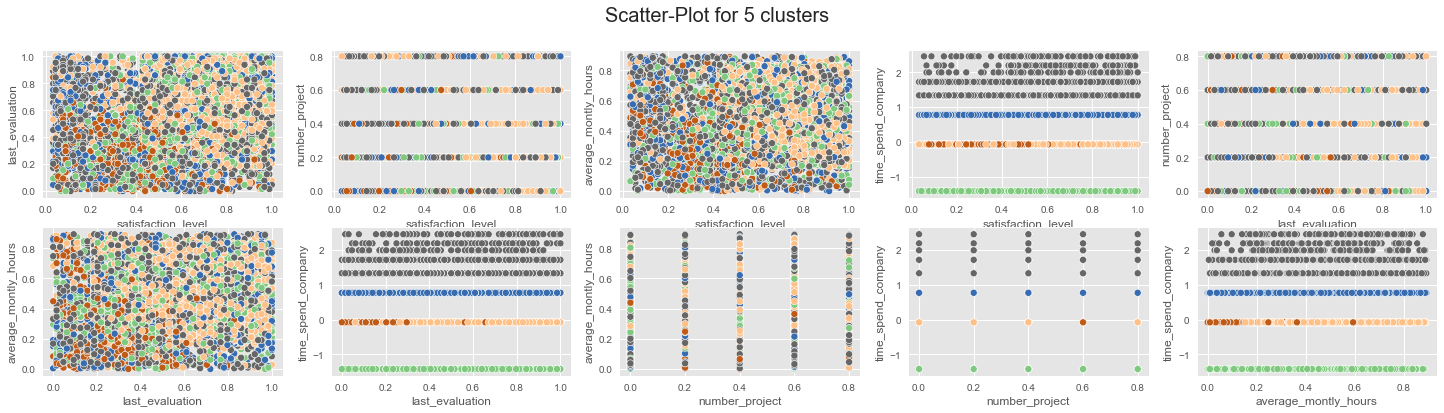

In [187]:
# Scatter plots for the result of cluster segmentation for employees who left the company
X_trans["left"] = df["left"]
feature_list = list(combinations(X_trans.drop(columns = ["left", "ClusterID"]).columns, 2))
for k in range(2, 6):
    data = X_trans[X_trans["left"] == "stayed"].drop(columns = ["left"])
    model = KMeans(n_clusters = k).fit(data)
    model.fit_predict(data)
    labels = model.labels_
    data['ClusterID']=labels

    fig, ax = plt.subplots(figsize = (25,6), nrows = int(len(feature_list)/5), ncols = 5)
    col_index, row_index = 0, 0
    for tup in feature_list:
        sns.scatterplot(data[tup[0]], data[tup[1]], c=data['ClusterID'],cmap='Accent', ax = ax[row_index, col_index])
        plt.xlabel(f'{tup[0]}')
        plt.ylabel(f'{tup[1]}')
        col_index+=1
        if col_index==5:
            col_index=0
            row_index=1
    fig.suptitle(f"Scatter-Plot for {k} clusters", fontsize=20)
    plt.show();

## 5. Model Building

### Split Data as Train and Test Set

In [333]:
df = pd.read_csv("HR_Dataset.csv")
df.columns = df.columns.str.strip().str.lower()
df.drop_duplicates(inplace=True)
df["left"] = df["left"].map({0:"stayed", 1:"left"})
X=df.drop(["left"], axis=1)
y=df["left"]

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [335]:
pt = PowerTransformer(method='yeo-johnson')
X_train['time_spend_company'] = pt.fit_transform(X_train[['time_spend_company']])
X_test['time_spend_company'] = pt.transform(X_test[['time_spend_company']])

cat_onehot = ['departments']
cat_ordinal = ['salary']
column_trans = make_column_transformer((OneHotEncoder(sparse=False), cat_onehot), 
                                       (OrdinalEncoder(), cat_ordinal), 
                                       remainder=MinMaxScaler(), n_jobs = -1)

In [336]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### KNeighbors Algorithm

In [239]:
operations = [("preprocessing", column_trans), ("knc", KNeighborsClassifier(n_neighbors=5))]
knc_vanilla_pipe = Pipeline(steps=operations)
knc_vanilla_pipe.fit(X_train, y_train)
eval_metric(knc_vanilla_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 346   52]
 [  64 1937]]
              precision    recall  f1-score   support

        left       0.84      0.87      0.86       398
      stayed       0.97      0.97      0.97      2001

    accuracy                           0.95      2399
   macro avg       0.91      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399


Train_Set
[[1399  194]
 [ 199 7800]]
              precision    recall  f1-score   support

        left       0.88      0.88      0.88      1593
      stayed       0.98      0.98      0.98      7999

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



In [240]:
y_pred = knc_vanilla_pipe.predict(X_test)
y_pred_proba = knc_vanilla_pipe.predict_proba(X_test)
pd.DataFrame(y_pred_proba)
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [241]:
pd.DataFrame.from_dict(my_dict).sample(10)

Actual    Pred  Proba_1  Proba_0
2386   stayed  stayed      1.0      0.0
5560   stayed  stayed      0.6      0.4
2038   stayed  stayed      1.0      0.0
6033   stayed    left      0.0      1.0
3967   stayed  stayed      0.8      0.2
151      left    left      0.0      1.0
7962   stayed  stayed      1.0      0.0
11288  stayed  stayed      1.0      0.0
2948   stayed  stayed      1.0      0.0
7253   stayed  stayed      1.0      0.0

In [244]:
recall_left =  make_scorer(f1_score, average=None, labels=["left"])
operations = [("preprocessing", column_trans), ("knc", KNeighborsClassifier())]
knc_pipe = Pipeline(steps=operations)
k_values= range(1,30)
param_grid = {"knc__n_neighbors":k_values, "knc__p": [1,2], "knc__weights": ['uniform', "distance"]}
knc_grid_model = GridSearchCV(knc_pipe, param_grid = param_grid, scoring=recall_left, cv=5, return_train_score=True, n_jobs=-1)
knc_grid_model.fit(X_train, y_train)
knc_grid_model.best_params_

{'knc__n_neighbors': 4, 'knc__p': 1, 'knc__weights': 'distance'}

In [245]:
eval_metric(knc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 352   46]
 [  56 1945]]
              precision    recall  f1-score   support

        left       0.86      0.88      0.87       398
      stayed       0.98      0.97      0.97      2001

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.92      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[1593    0]
 [   0 7999]]
              precision    recall  f1-score   support

        left       1.00      1.00      1.00      1593
      stayed       1.00      1.00      1.00      7999

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [337]:
operations = [("preprocessing", column_trans), ("knc", KNeighborsClassifier(n_neighbors = 4, p = 1, weights = "distance"))]
knc_final_pipe = Pipeline(steps=operations)
knc_final_pipe.fit(X_train, y_train)
y_pred = knc_final_pipe.predict(X_test)
eval_metric(knc_final_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 352   46]
 [  56 1945]]
              precision    recall  f1-score   support

        left       0.86      0.88      0.87       398
      stayed       0.98      0.97      0.97      2001

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.92      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[1593    0]
 [   0 7999]]
              precision    recall  f1-score   support

        left       1.00      1.00      1.00      1593
      stayed       1.00      1.00      1.00      7999

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [339]:
knc_f1_score = f1_score(y_test, y_pred, pos_label = "left")
knc_f1_score

0.8734491315136478

### #SVC Algorithm

#### Model Building

In [246]:
operations = [("preprocessing", column_trans), ("svc", SVC(random_state=101))]
svc_vanilla_pipe = Pipeline(steps=operations)
svc_vanilla_pipe.fit(X_train, y_train)
eval_metric(svc_vanilla_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 317   81]
 [  55 1946]]
              precision    recall  f1-score   support

        left       0.85      0.80      0.82       398
      stayed       0.96      0.97      0.97      2001

    accuracy                           0.94      2399
   macro avg       0.91      0.88      0.89      2399
weighted avg       0.94      0.94      0.94      2399


Train_Set
[[1316  277]
 [ 214 7785]]
              precision    recall  f1-score   support

        left       0.86      0.83      0.84      1593
      stayed       0.97      0.97      0.97      7999

    accuracy                           0.95      9592
   macro avg       0.91      0.90      0.91      9592
weighted avg       0.95      0.95      0.95      9592



In [249]:
recall_left =  make_scorer(f1_score, average=None, labels=["left"])
operations = [("preprocessing", column_trans), ("SVC", SVC(random_state=101))]
svc_pipe = Pipeline(steps=operations)
param_grid = {'SVC__C':[0.01, 0.1, 1, 10],
              'SVC__kernel':['linear','rbf','sigmoid','poly'],
              'SVC__gamma':["scale", "auto"],
              'SVC__degree':[2,3],
              'SVC__class_weight': [None, 'balanced']}
svc_grid_model = GridSearchCV(svc_pipe, param_grid = param_grid, scoring=recall_left, cv=5, return_train_score=True, n_jobs=-1)
svc_grid_model.fit(X_train, y_train)
svc_grid_model.best_params_

{'SVC__C': 10,
 'SVC__class_weight': None,
 'SVC__degree': 2,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf'}

#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [250]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 348   50]
 [  51 1950]]
              precision    recall  f1-score   support

        left       0.87      0.87      0.87       398
      stayed       0.97      0.97      0.97      2001

    accuracy                           0.96      2399
   macro avg       0.92      0.92      0.92      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[1406  187]
 [ 184 7815]]
              precision    recall  f1-score   support

        left       0.88      0.88      0.88      1593
      stayed       0.98      0.98      0.98      7999

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



In [340]:
operations = [("preprocessing", column_trans), ("svc", SVC(C = 10, degree = 2, gamma = "scale", kernel = "rbf"))]
svc_final_pipe = Pipeline(steps=operations)
svc_final_pipe.fit(X_train, y_train)
y_pred = svc_final_pipe.predict(X_test)
eval_metric(svc_final_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 348   50]
 [  51 1950]]
              precision    recall  f1-score   support

        left       0.87      0.87      0.87       398
      stayed       0.97      0.97      0.97      2001

    accuracy                           0.96      2399
   macro avg       0.92      0.92      0.92      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[1406  187]
 [ 184 7815]]
              precision    recall  f1-score   support

        left       0.88      0.88      0.88      1593
      stayed       0.98      0.98      0.98      7999

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



In [341]:
svc_f1_score = f1_score(y_test, y_pred, pos_label = "left")
svc_f1_score

0.8732747804265998

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

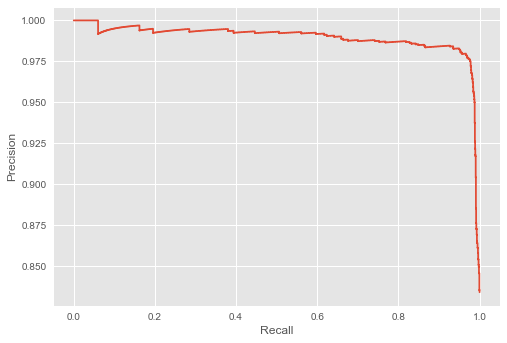

In [251]:
operations_svc = [("preprocessing", column_trans), ("SVC", SVC(C=10, class_weight = "balanced", degree = 2, gamma='scale', kernel = 'rbf', random_state=101))]
model = Pipeline(steps=operations_svc)
model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

precision, recall, threshold = precision_recall_curve(y_test.map({"stayed":1, "left":0}), decision_function)
prd = PrecisionRecallDisplay(precision, recall)
prd.plot();

#### Prediction

In [24]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

### #Random Forest Classifier

#### Model Building

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

pt = PowerTransformer(method='yeo-johnson')
X_train['time_spend_company'] = pt.fit_transform(X_train[['time_spend_company']])
X_test['time_spend_company'] = pt.transform(X_test[['time_spend_company']])

cat_ordinal = ['departments', 'salary']
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_ordinal), 
                                       remainder=MinMaxScaler(), n_jobs = -1)

operations = [("preprocessing", column_trans), ("RF_model", RandomForestClassifier(n_jobs = -1, random_state=101))]
rf_vanilla_pipe = Pipeline(steps=operations)
rf_vanilla_pipe.fit(X_train, y_train)
y_pred = rf_vanilla_pipe.predict(X_test)
eval_metric(rf_vanilla_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 364   34]
 [   2 1999]]
              precision    recall  f1-score   support

        left       0.99      0.91      0.95       398
      stayed       0.98      1.00      0.99      2001

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.98      0.98      2399


Train_Set
[[1593    0]
 [   0 7999]]
              precision    recall  f1-score   support

        left       1.00      1.00      1.00      1593
      stayed       1.00      1.00      1.00      7999

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [254]:
recall_left =  make_scorer(f1_score, average=None, labels=["left"])

operations = [("preprocessing", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                   n_jobs = -1, random_state=101))]
rf_pipe_model = Pipeline(steps=operations)
param_grid = {'RF_model__n_estimators':[50, 100, 200, 400, 500],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4, 10],
             #'RF_model__min_samples_split':[2, 3, 4],
             #'RF_model__min_samples_leaf': [2, 3, 4],
             'RF_model__max_samples':[0.5, 0.8, 1]}
rf_grid_model = GridSearchCV(rf_pipe_model, param_grid, scoring = recall_left, cv = 5, 
                             return_train_score = True, n_jobs = -1, verbose=3).fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [255]:
rf_grid_model.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 4,
 'RF_model__max_samples': 0.8,
 'RF_model__n_estimators': 50}

In [256]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 362   36]
 [   4 1997]]
              precision    recall  f1-score   support

        left       0.99      0.91      0.95       398
      stayed       0.98      1.00      0.99      2001

    accuracy                           0.98      2399
   macro avg       0.99      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[1505   88]
 [  17 7982]]
              precision    recall  f1-score   support

        left       0.99      0.94      0.97      1593
      stayed       0.99      1.00      0.99      7999

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



#### Evaluating Model Performance and Tuning

In [257]:
operations = [("preprocessing", column_trans), ("RF_model", RandomForestClassifier(n_estimators = 50, max_features = 4, 
                                                                                   max_depth = 10, max_samples = 0.8, 
                                                                                   n_jobs = -1, random_state=101, class_weight="balanced"))]
rf_final_pipe = Pipeline(steps=operations)
scores = cross_validate(rf_final_pipe, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.983319
train_accuracy           0.989702
test_precision_micro     0.983319
train_precision_micro    0.989702
test_recall_micro        0.983319
train_recall_micro       0.989702
test_f1_micro            0.983319
train_f1_micro           0.989702
dtype: float64

In [342]:
rf_final_pipe.fit(X_train, y_train)
y_pred = rf_final_pipe.predict(X_test)
eval_metric(rf_final_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 362   36]
 [   4 1997]]
              precision    recall  f1-score   support

        left       0.99      0.91      0.95       398
      stayed       0.98      1.00      0.99      2001

    accuracy                           0.98      2399
   macro avg       0.99      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[1505   88]
 [  17 7982]]
              precision    recall  f1-score   support

        left       0.99      0.94      0.97      1593
      stayed       0.99      1.00      0.99      7999

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



In [343]:
rf_f1_score = f1_score(y_test, y_pred, pos_label = "left")
rf_f1_score

0.9476439790575917

#### Prediction

In [ ]:
y_pred = rf_final_pipe.predict(X_test)

### #XGBoost Classifier

#### Model Building

In [259]:
operations = [("preprocessing", column_trans), ("xgb_model", XGBClassifier(n_jobs = -1, random_state=101))]
xgb_vanilla_pipe = Pipeline(steps=operations)
xgb_vanilla_pipe.fit(X_train, y_train)
eval_metric(xgb_vanilla_pipe, X_train, y_train, X_test, y_test)

[15:57:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test_Set
[[ 365   33]
 [   9 1992]]
              precision    recall  f1-score   support

        left       0.98      0.92      0.95       398
      stayed       0.98      1.00      0.99      2001

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[1561   32]
 [   7 7992]]
              precision    recall  f1-score   support

        left       1.00      0.98      0.99      1593
      stayed       1.00      1.00      1.00      7999

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592


#### Evaluating Model Performance and Tuning

In [279]:
recall_left =  make_scorer(f1_score, average=None, labels=["left"])
weights = class_weight.compute_sample_weight(class_weight = "balanced", y = y_train)

operations = [("preprocessing", column_trans), ("xgb_model", XGBClassifier(n_jobs = -1, random_state=101))]
xgb_pipe_model = Pipeline(steps=operations)
param_grid = {"xgb_model__n_estimators":[100],'xgb_model__max_depth':[6], "xgb_model__learning_rate": [0.1],
             "xgb_model__subsample":[0.2], "xgb_model__colsample_bytree":[0.5], "xgb_model__colsample_bylevel":[1]}
xgb_grid_model = GridSearchCV(xgb_pipe_model, param_grid, scoring = recall_left, cv = 5, 
                             return_train_score = True, n_jobs = -1, verbose=3)
xgb_grid_model.fit(X_train, y_train, xgb_model__sample_weight = weights, xgb_model__eval_metric = "logloss")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder=MinMaxScaler(),
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['departments',
                                                                          'salary'])])),
                                       ('xgb_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsam...
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1,
             param_grid={'xgb_model__colsample_bylevel': [1],
                         'xgb_model__colsample_bytree': [0.5],
                         'xgb_model__learning_rate': [0.1],
                         'xgb_model__max_depth': [6],
                         'xgb_model__n_estimators': [100],
                         'xgb_model__subsample': [0.2]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['left']),
             verbose=3)

In [261]:
xgb_grid_model.best_params_

{'xgb_model__colsample_bylevel': 1,
 'xgb_model__colsample_bytree': 0.5,
 'xgb_model__learning_rate': 0.1,
 'xgb_model__max_depth': 6,
 'xgb_model__n_estimators': 100,
 'xgb_model__subsample': 0.2}

In [280]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 366   32]
 [  31 1970]]
              precision    recall  f1-score   support

        left       0.92      0.92      0.92       398
      stayed       0.98      0.98      0.98      2001

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[1505   88]
 [ 113 7886]]
              precision    recall  f1-score   support

        left       0.93      0.94      0.94      1593
      stayed       0.99      0.99      0.99      7999

    accuracy                           0.98      9592
   macro avg       0.96      0.97      0.96      9592
weighted avg       0.98      0.98      0.98      9592



In [281]:
operations = [("preprocessing", column_trans), ("xgb_model", XGBClassifier(n_estimators = 100, max_depth = 6, 
                                                                           learning_rate = 0.1, subsample = 0.2, 
                                                                           colsample_bytree = 0.5, colsample_bylevel = 1, 
                                                                           n_jobs = -1, random_state=101))]
xgb_final_model = Pipeline(steps=operations)
scores = cross_validate(xgb_final_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True, fit_params={"xgb_model__eval_metric":"logloss", "xgb_model__sample_weight": weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.973312
train_accuracy           0.979161
test_precision_micro     0.973312
train_precision_micro    0.979161
test_recall_micro        0.973312
train_recall_micro       0.979161
test_f1_micro            0.973312
train_f1_micro           0.979161
dtype: float64

In [282]:
xgb_final_model.fit(X_train, y_train, xgb_model__sample_weight = weights, xgb_model__eval_metric = "logloss")
eval_metric(xgb_final_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 366   32]
 [  31 1970]]
              precision    recall  f1-score   support

        left       0.92      0.92      0.92       398
      stayed       0.98      0.98      0.98      2001

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[1505   88]
 [ 113 7886]]
              precision    recall  f1-score   support

        left       0.93      0.94      0.94      1593
      stayed       0.99      0.99      0.99      7999

    accuracy                           0.98      9592
   macro avg       0.96      0.97      0.96      9592
weighted avg       0.98      0.98      0.98      9592



In [344]:
y_pred = xgb_final_model.predict(X_test)
xgb_f1_score = f1_score(y_test, y_pred, pos_label = "left")
xgb_f1_score

0.9207547169811321

#### Prediction

In [ ]:
y_pred = xgb_final_model.predict(X_test)

### #ANN Classifier

In [297]:
df = pd.read_csv("HR_Dataset.csv")
df.columns = df.columns.str.strip().str.lower()
df.drop_duplicates(inplace=True)
X=df.drop(["left"], axis=1)
y=df["left"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.10,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

pt = PowerTransformer(method='yeo-johnson')
X_train['time_spend_company'] = pt.fit_transform(X_train[['time_spend_company']])
X_val['time_spend_company'] = pt.transform(X_val[['time_spend_company']])
X_test['time_spend_company'] = pt.transform(X_test[['time_spend_company']])

cat_onehot = ['departments']
cat_ordinal = ['salary']
column_trans = make_column_transformer((OneHotEncoder(sparse=False), cat_onehot), 
                                       (OrdinalEncoder(), cat_ordinal), 
                                       remainder=MinMaxScaler(), n_jobs = -1)
X_train = column_trans.fit_transform(X_train)
X_val = column_trans.fit_transform(X_val)
X_test = column_trans.fit_transform(X_test)
weights = np.unique(class_weight.compute_sample_weight(class_weight = "balanced", y = y_train))

#### Layer Architecture Building and Compiling

In [299]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(int(X_train.shape[1]*2), activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(int(X_train.shape[1]*1.5), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(int(X_train.shape[1]*0.5), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(learning_rate = 0.002), loss = 'binary_crossentropy', metrics=['Recall'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 36)                684       
                                                                 
 dropout_4 (Dropout)         (None, 36)                0         
                                                                 
 dense_6 (Dense)             (None, 27)                999       
                                                                 
 dropout_5 (Dropout)         (None, 27)                0         
                                                                 
 dense_7 (Dense)             (None, 18)                504       
                                                                 
 dropout_6 (Dropout)         (None, 18)                0         
                                                                 
 dense_8 (Dense)             (None, 9)                

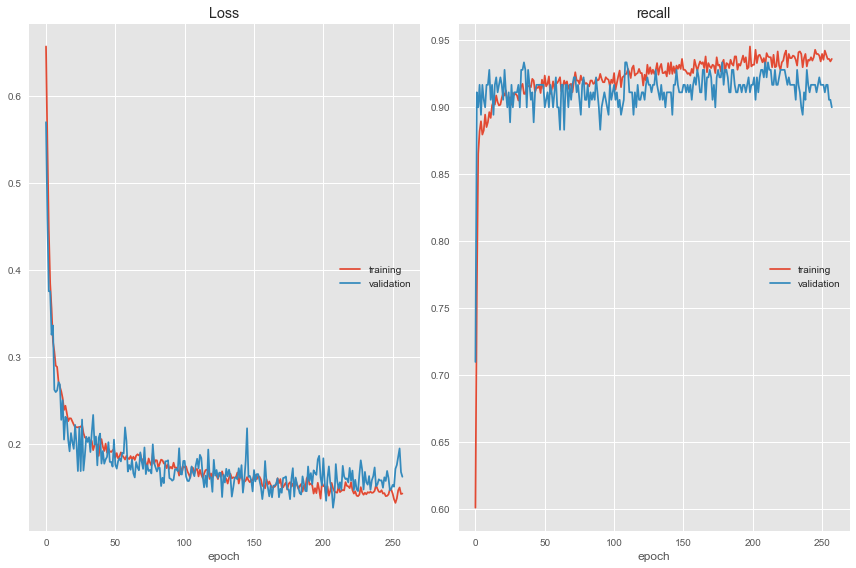

Loss
	training         	 (min:    0.133, max:    0.656, cur:    0.143)
	validation       	 (min:    0.127, max:    0.569, cur:    0.163)
recall
	training         	 (min:    0.601, max:    0.945, cur:    0.936)
	validation       	 (min:    0.709, max:    0.933, cur:    0.899)
76/76 [==============================] - 0s 6ms/step - loss: 0.1434 - recall: 0.9355 - val_loss: 0.1627 - val_recall: 0.8994
Epoch 258: early stopping


In [300]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 50, restore_best_weights = True)
model.fit(x = X_train, y = y_train, validation_data=(X_val, y_val), batch_size = 128, epochs = 1000, class_weight={0:weights[0] , 1:weights[1]}, use_multiprocessing = True, callbacks=[early_stop, PlotLossesKerasTF()])

#### Evaluating Model Performance and Tunning

In [301]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) > 0.5
    y_pred = model.predict(X_test) > 0.5
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [302]:
eval_metric(model, X_train, y_train, X_test, y_test)

38/38 [==============================] - 0s 946us/step
Test_Set
[[974  27]
 [ 17 182]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1001
           1       0.87      0.91      0.89       199

    accuracy                           0.96      1200
   macro avg       0.93      0.94      0.94      1200
weighted avg       0.96      0.96      0.96      1200


Train_Set
[[7936  162]
 [ 111 1502]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8098
           1       0.90      0.93      0.92      1613

    accuracy                           0.97      9711
   macro avg       0.94      0.96      0.95      9711
weighted avg       0.97      0.97      0.97      9711



In [314]:
import optuna
# optimizers for gradient descent to use in backpropagation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam 
from tensorflow.keras.metrics import RecallAtPrecision

In [315]:
#trial_metric = RecallAtPrecision(0.85)
batch_size = 300

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 128)
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[RecallAtPrecision(0.85)])
    return model

def objective(trial):
    model = create_model(trial)
    model.fit(X_train,
              y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=200,
              callbacks=[early_stop],
              class_weight={0: weights[0], 1: weights[1]},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    #if score > .86 : # after this threshold model gets terrible scores for class 0
        #score = score * 0
    return score

In [316]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)
study.best_params

[I 2023-02-24 16:57:32,293] A new study created in memory with name: no-name-430c4602-99de-40ef-b8ff-211ee2f0af2e


Restoring model weights from the end of the best epoch: 148.
Epoch 198: early stopping


[I 2023-02-24 16:57:48,650] Trial 0 finished with value: 0.9346733689308167 and parameters: {'n_units1': 25, 'n_units2': 56, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.10639487492037787}. Best is trial 0 with value: 0.9346733689308167.
[I 2023-02-24 16:58:04,968] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 73, 'n_units2': 78, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 2.5165203203016317e-05}. Best is trial 0 with value: 0.9346733689308167.
[I 2023-02-24 16:58:19,382] Trial 2 finished with value: 0.9195979833602905 and parameters: {'n_units1': 8, 'n_units2': 59, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.01879939227329008}. Best is trial 0 with value: 0.9346733689308167.
[I 2023-02-24 16:58:34,823] Trial 3 finished with value: 0.9346733689308167 and parameters: {'n_units1': 11, 'n_units2': 122, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmspro

Restoring model weights from the end of the best epoch: 50.
Epoch 100: early stopping


[I 2023-02-24 16:58:43,442] Trial 4 finished with value: 0.9246231317520142 and parameters: {'n_units1': 53, 'n_units2': 36, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.04847814887893192}. Best is trial 0 with value: 0.9346733689308167.
[I 2023-02-24 16:58:59,989] Trial 5 finished with value: 0.12562814354896545 and parameters: {'n_units1': 61, 'n_units2': 27, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 6.340674635873447e-05}. Best is trial 0 with value: 0.9346733689308167.


Restoring model weights from the end of the best epoch: 17.
Epoch 67: early stopping


[I 2023-02-24 16:59:06,466] Trial 6 finished with value: 0.9145728349685669 and parameters: {'n_units1': 83, 'n_units2': 29, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.006975209123627668}. Best is trial 0 with value: 0.9346733689308167.


Restoring model weights from the end of the best epoch: 24.
Epoch 74: early stopping


[I 2023-02-24 16:59:13,412] Trial 7 finished with value: 0.9346733689308167 and parameters: {'n_units1': 63, 'n_units2': 121, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.020276033990141086}. Best is trial 0 with value: 0.9346733689308167.


Restoring model weights from the end of the best epoch: 75.
Epoch 125: early stopping


[I 2023-02-24 16:59:24,615] Trial 8 finished with value: 0.9396985173225403 and parameters: {'n_units1': 67, 'n_units2': 113, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.054802087336842914}. Best is trial 8 with value: 0.9396985173225403.
[I 2023-02-24 16:59:40,826] Trial 9 finished with value: 0.8592965006828308 and parameters: {'n_units1': 17, 'n_units2': 107, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.00016952825928223173}. Best is trial 8 with value: 0.9396985173225403.
[I 2023-02-24 16:59:57,715] Trial 10 finished with value: 0.11055276542901993 and parameters: {'n_units1': 121, 'n_units2': 91, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0031914980273506483}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 24.
Epoch 74: early stopping


[I 2023-02-24 17:00:04,215] Trial 11 finished with value: 0.9246231317520142 and parameters: {'n_units1': 36, 'n_units2': 56, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0946992343192103}. Best is trial 8 with value: 0.9396985173225403.
[I 2023-02-24 17:00:20,823] Trial 12 finished with value: 0.9246231317520142 and parameters: {'n_units1': 96, 'n_units2': 83, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.12830450835479348}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 25.
Epoch 75: early stopping


[I 2023-02-24 17:00:27,748] Trial 13 finished with value: 0.9246231317520142 and parameters: {'n_units1': 41, 'n_units2': 48, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.036020122194699106}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 52.
Epoch 102: early stopping


[I 2023-02-24 17:00:36,784] Trial 14 finished with value: 0.9045225977897644 and parameters: {'n_units1': 100, 'n_units2': 13, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.1219809377069002}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 25.
Epoch 75: early stopping


[I 2023-02-24 17:00:43,623] Trial 15 finished with value: 0.9195979833602905 and parameters: {'n_units1': 38, 'n_units2': 96, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.008970208077189451}. Best is trial 8 with value: 0.9396985173225403.
[I 2023-02-24 17:01:04,378] Trial 16 finished with value: 0.0 and parameters: {'n_units1': 28, 'n_units2': 69, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.03863509735258089}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 72.
Epoch 122: early stopping


[I 2023-02-24 17:01:18,136] Trial 17 finished with value: 0.9246231317520142 and parameters: {'n_units1': 50, 'n_units2': 106, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0021568652917802068}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 14.
Epoch 64: early stopping


[I 2023-02-24 17:01:25,590] Trial 18 finished with value: 0.9246231317520142 and parameters: {'n_units1': 126, 'n_units2': 67, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.011458364497578075}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 30.
Epoch 80: early stopping


[I 2023-02-24 17:01:33,865] Trial 19 finished with value: 0.909547746181488 and parameters: {'n_units1': 81, 'n_units2': 47, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.04856240544485304}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 93.
Epoch 143: early stopping


[I 2023-02-24 17:01:46,886] Trial 20 finished with value: 0.9246231317520142 and parameters: {'n_units1': 25, 'n_units2': 111, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0005105437499393635}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 125.
Epoch 175: early stopping


[I 2023-02-24 17:02:01,317] Trial 21 finished with value: 0.929648220539093 and parameters: {'n_units1': 10, 'n_units2': 128, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0008846726675028684}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 76.
Epoch 126: early stopping


[I 2023-02-24 17:02:11,988] Trial 22 finished with value: 0.9145728349685669 and parameters: {'n_units1': 22, 'n_units2': 117, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.003836082558440728}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 107.
Epoch 157: early stopping


[I 2023-02-24 17:02:25,563] Trial 23 finished with value: 0.9045225977897644 and parameters: {'n_units1': 50, 'n_units2': 92, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0014468047108766187}. Best is trial 8 with value: 0.9396985173225403.


Restoring model weights from the end of the best epoch: 24.
Epoch 74: early stopping


[I 2023-02-24 17:02:32,681] Trial 24 finished with value: 0.9346733689308167 and parameters: {'n_units1': 110, 'n_units2': 128, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.005560160331426456}. Best is trial 8 with value: 0.9396985173225403.


{'n_units1': 67,
 'n_units2': 113,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'learning_rate': 0.054802087336842914}

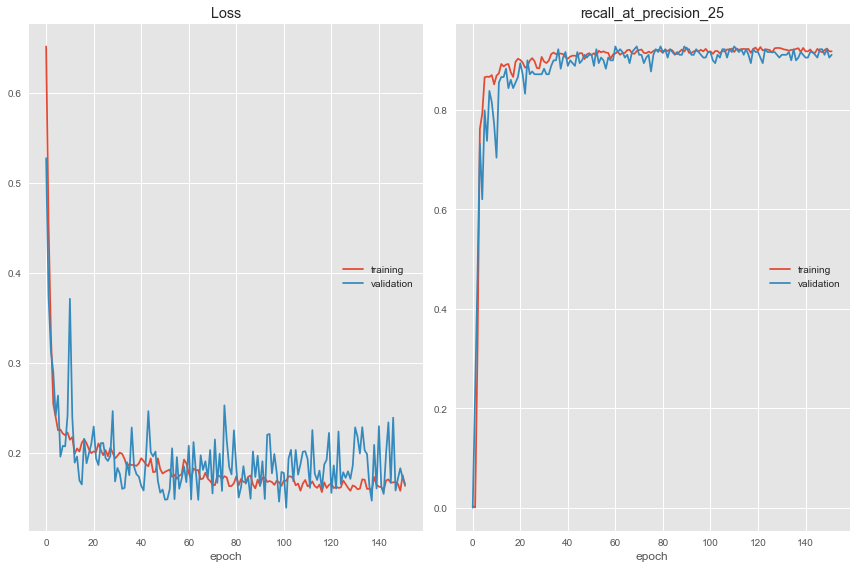

Loss
	training         	 (min:    0.156, max:    0.651, cur:    0.163)
	validation       	 (min:    0.139, max:    0.527, cur:    0.165)
recall_at_precision_25
	training         	 (min:    0.001, max:    0.926, cur:    0.918)
	validation       	 (min:    0.000, max:    0.927, cur:    0.911)
38/38 [==============================] - 0s 10ms/step - loss: 0.1632 - recall_at_precision_25: 0.9175 - val_loss: 0.1655 - val_recall_at_precision_25: 0.9106
Epoch 152: early stopping


In [319]:
unit1, unit2, optimizer, lr = (study.best_params['n_units1'],
                               study.best_params['n_units2'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'])
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[RecallAtPrecision(0.85)])
model.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          batch_size=256,
          epochs=200,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight={0: weights[0], 1: weights[1]},
          verbose=1)

In [320]:
eval_metric(model, X_train, y_train, X_test, y_test)

38/38 [==============================] - 0s 932us/step
Test_Set
[[978  23]
 [ 17 182]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1001
           1       0.89      0.91      0.90       199

    accuracy                           0.97      1200
   macro avg       0.94      0.95      0.94      1200
weighted avg       0.97      0.97      0.97      1200


Train_Set
[[7938  160]
 [ 147 1466]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8098
           1       0.90      0.91      0.91      1613

    accuracy                           0.97      9711
   macro avg       0.94      0.94      0.94      9711
weighted avg       0.97      0.97      0.97      9711



In [332]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
ann_f1_score = f1_score(y_test, y_pred, pos_label = 1)
ann_f1_score

38/38 [==============================] - 0s 919us/step


0.9009900990099009

## MODEL COMPARISION

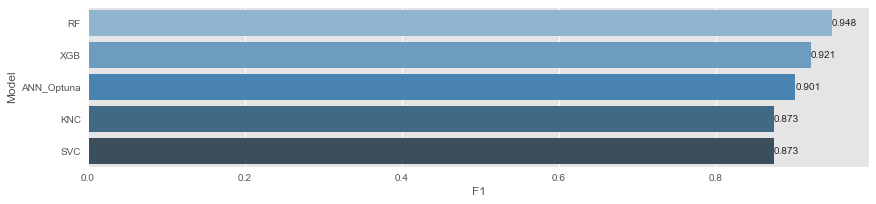

In [345]:
compare = pd.DataFrame({
    "Model": ["KNC", "SVC", "RF", "XGB", "ANN_Optuna"],
    "F1": [knc_f1_score, svc_f1_score, rf_f1_score, xgb_f1_score, ann_f1_score]
})


def labels(ax):
    for p in ax.patches:
        width = p.get_width()  # get bar length
        ax.text(
            width,  # set the text at 1 unit right of the bar
            p.get_y() +
            p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),  # set variable to display, 2 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

### #Final Model

In [285]:
df = pd.read_csv("HR_Dataset.csv")
df.columns = df.columns.str.strip().str.lower()
df.drop_duplicates(inplace=True)
df["left"] = df["left"].map({0:"stayed", 1:"left"})
X=df.drop(["left"], axis=1)
y=df["left"]

pt = PowerTransformer(method='yeo-johnson')
X['time_spend_company'] = pt.fit_transform(X[['time_spend_company']])
pickle.dump(pt, open('power_transformer', 'wb'))


cat_ordinal = ['departments', 'salary']
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_ordinal), 
                                       remainder=MinMaxScaler(), n_jobs = -1)
X_trans = column_trans.fit_transform(X)
pickle.dump(column_trans, open('transformer', 'wb'))
rf_final_model = RandomForestClassifier(n_estimators = 50, max_features = 4, max_depth = 10, max_samples = 0.8, 
                       n_jobs = -1, random_state=101, class_weight="balanced")
rf_final_model.fit(X_trans, y)
pickle.dump(rf_final_model, open('rf_final_model', 'wb'))

y_pred = rf_final_model.predict(X_trans)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

        left       0.99      0.94      0.97      1991
      stayed       0.99      1.00      0.99     10000

    accuracy                           0.99     11991
   macro avg       0.99      0.97      0.98     11991
weighted avg       0.99      0.99      0.99     11991

